# Evaluación 5: Modelos de ecuaciones estructurales 

## Parte 1: Análisis Factorial Confirmatorio


> Requiere cargar el archivo ["panas.sav"](https://github.com/renatoparedes/EstadisticaYPsicologiaMatematica/raw/main/Evaluaciones/panas.sav) en el repositorio local.

En esta evaluación vamos a trabajar con los datos de validación de la escala Positive and Negative Affect Schedule (PANAS). Se trata de una medida de autoreporte que se compone de dos escalas de estado de ánimo, una que mide el afecto positivo y la otra que mide el afecto negativo: 

**Positive Affect**
- pn1: interested
- pn4: proud
- pn6: determined
- pn7: active
- pn9: strong 
- pn12: inspired
- pn13: attentive
- pn15: excited
- pn17: enthusiastic
- pn18: alert


**Negative Affect**
- pn2: upset
- pn3: scared
- pn5: ashamed
- pn8: distressed
- pn10: hostile
- pn11: irritable
- pn14: afraid
- pn16: guilty
- pn19: nervous
- pn20: jittery

En esta oportunidad te corresponder examinar si dicha estructura factorial puede confirmarse a partir de los siguientes datos recogidos: 

In [ ]:
!pip install pyreadstat
!pip install factor_analyzer
!wget https://github.com/renatoparedes/EstadisticaYPsicologiaMatematica/raw/main/Evaluaciones/panas.sav
!wget https://github.com/renatoparedes/EstadisticaYPsicologiaMatematica/raw/main/Evaluaciones/Fertilidad.sav

In [2]:
import pandas as pd
from sklearn.preprocessing import StandardScaler

df = pd.read_spss("panas.sav")
df.drop(columns=["sex", "age", "id"], inplace=True)
df

,pn1,pn2,pn3,pn4,pn5,pn6,pn7,pn8,pn9,pn10,pn11,pn12,pn13,pn14,pn15,pn16,pn17,pn18,pn19,pn20
0,5.0,5.0,4.0,4.0,4.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,3.0,5.0,3.0,5.0,5.0,4.0,4.0
1,4.0,5.0,4.0,5.0,3.0,3.0,3.0,2.0,5.0,4.0,4.0,4.0,4.0,3.0,2.0,2.0,2.0,3.0,4.0,4.0
2,2.0,1.0,2.0,2.0,1.0,1.0,3.0,1.0,1.0,1.0,1.0,1.0,1.0,2.0,2.0,2.0,1.0,1.0,2.0,1.0
3,5.0,5.0,3.0,5.0,2.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,4.0,2.0,5.0,5.0,5.0,5.0,3.0,1.0
4,1.0,1.0,1.0,1.0,1.0,1.0,1.0,2.0,3.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
428,4.0,2.0,3.0,4.0,1.0,4.0,4.0,2.0,4.0,1.0,2.0,2.0,3.0,3.0,3.0,1.0,4.0,3.0,2.0,1.0
429,5.0,2.0,2.0,5.0,1.0,3.0,4.0,3.0,3.0,2.0,3.0,3.0,3.0,2.0,2.0,1.0,3.0,4.0,1.0,1.0
430,4.0,2.0,1.0,4.0,1.0,4.0,4.0,3.0,2.0,1.0,2.0,1.0,1.0,1.0,2.0,1.0,3.0,3.0,1.0,1.0
431,4.0,3.0,2.0,3.0,1.0,5.0,5.0,3.0,4.0,1.0,1.0,5.0,5.0,3.0,5.0,1.0,5.0,5.0,1.0,1.0


1. Define el modelo de acuerdo a la descripción brindada. Genera un gráfico para mostrar los items y constructos definido (2 pts).
> Sugerencia: Utiliza el método `semplot` disponible en el paquete `semopy`.

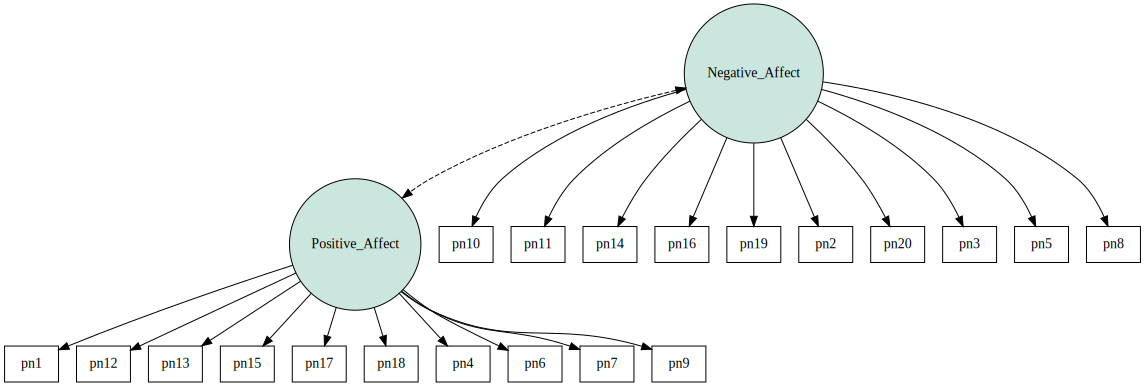

In [3]:
import semopy

measure_desc = """
# Measurement
Positive_Affect =~ pn1 + pn4 + pn6 + pn7 + pn9 + pn12 + pn13 + pn15 + pn17 + pn18
Negative_Affect =~ pn2 + pn3 + pn5 + pn8 + pn10 + pn11 + pn14 + pn16 + pn19 + pn20
"""

g = semopy.semplot(measure_desc, "out.png", plot_covs=True)
g

2. Ajusta el modelo a tus datos y verifica las métricas de bondad de ajuste. ¿Qué puedes concluir en relación al ajuste general del modelo? ¿Notas algún problema de estimación o identificación? (2 pts).

In [4]:
measure_model = semopy.Model(measure_desc)
res = measure_model.fit(df)
stats = semopy.calc_stats(measure_model)
print(stats.T)

                     Value
DoF             169.000000
DoF Baseline    190.000000
chi2            946.899890
chi2 p-value      0.000000
chi2 Baseline  4099.136795
CFI               0.801005
GFI               0.769000
AGFI              0.740296
NFI               0.769000
TLI               0.776277
RMSEA             0.103223
AIC              77.626328
BIC             244.526575
LogLik            2.186836


In [5]:
estimates = measure_model.inspect(std_est=True)
estimates

,lval,op,rval,Estimate,Est. Std,Std. Err,z-value,p-value
0,pn1,~,Positive_Affect,1.000000,0.669659,-,-,-
1,pn4,~,Positive_Affect,0.903217,0.495396,0.095429,9.464799,0.0
2,pn6,~,Positive_Affect,0.889532,0.538605,0.086954,10.229976,0.0
3,pn7,~,Positive_Affect,1.123087,0.620751,0.096448,11.644472,0.0
4,pn9,~,Positive_Affect,1.028645,0.624662,0.08784,11.71043,0.0
5,pn12,~,Positive_Affect,1.431281,0.735562,0.105864,13.520027,0.0
6,pn13,~,Positive_Affect,1.147744,0.702207,0.088364,12.988833,0.0
7,pn15,~,Positive_Affect,1.150119,0.627412,0.097827,11.756715,0.0
8,pn17,~,Positive_Affect,1.366105,0.829515,0.091493,14.931268,0.0
9,pn18,~,Positive_Affect,1.184991,0.734645,0.087741,13.505602,0.0


3. Evalúa la validez del modelo de medición específicado. ¿Qué puedes comentar en relación a las cargas factoriales? ¿Y en relación a los residuos? (2 pts).

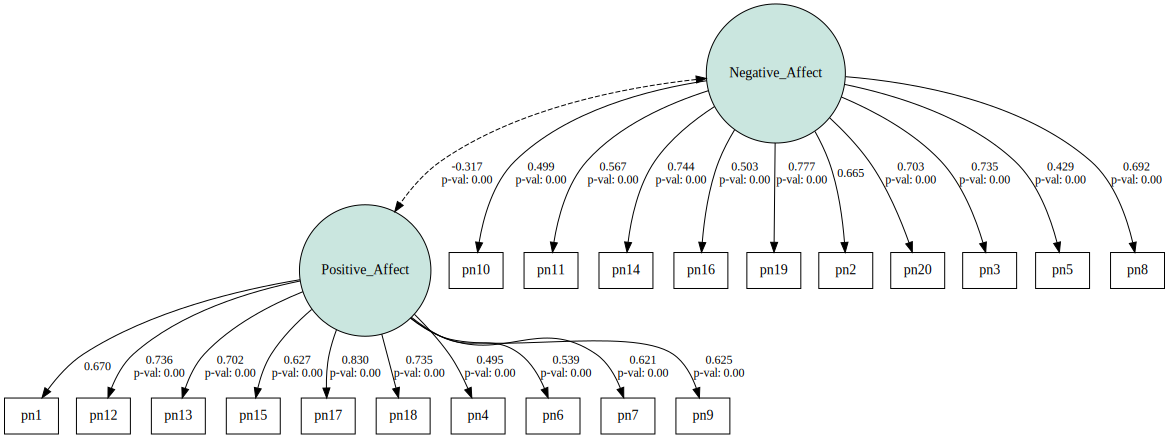

In [6]:
g = semopy.semplot(measure_model, "out.png", std_ests=True, plot_covs=True)
g

In [7]:
import numpy as np

cov_estimate, _ = measure_model.calc_sigma()
cov = measure_model.mx_cov
residual = cov - cov_estimate
std_residual = residual / np.std(residual)

std_res = pd.DataFrame(
    std_residual,
    columns=measure_model.names_lambda[0],
    index=measure_model.names_lambda[0],
)
std_res

,pn1,pn10,pn11,pn12,pn13,pn14,pn15,pn16,pn17,pn18,pn19,pn2,pn20,pn3,pn4,pn5,pn6,pn7,pn8,pn9
pn1,0.001170,0.041506,-0.836430,-0.168414,0.190554,0.243599,-0.183719,-0.839506,0.030901,-0.110503,0.171554,0.274164,-0.427142,0.290110,0.355098,0.160423,0.008087,0.151139,-1.192573,-0.171859
pn10,0.041506,0.000242,4.296484,0.963542,0.007338,-1.607149,0.740870,1.116450,0.225845,0.472820,-0.492619,1.264148,0.343118,-1.876323,0.117084,0.557556,2.129059,-0.054451,0.516453,0.548905
pn11,-0.836430,4.296484,-0.000486,0.136090,-0.944472,-1.391694,0.452918,0.814113,-0.684491,-0.862807,-0.823750,1.767958,-0.288754,-1.421151,-1.333716,0.350782,0.877299,-1.824384,0.873737,-1.004572
pn12,-0.168414,0.963542,0.136090,0.000918,1.218562,0.631376,0.731436,0.922040,0.324310,-0.759918,1.681079,-0.956887,1.590958,0.458876,-0.551883,0.490655,0.384317,-0.828427,-0.317475,-0.684506
pn13,0.190554,0.007338,-0.944472,1.218562,0.000640,0.265019,-1.117360,-0.208275,-0.295932,0.798719,1.011201,-0.131732,0.335393,0.251207,-0.291530,-0.486847,-0.628600,-0.411552,-0.434764,-0.298744
pn14,0.243599,-1.607149,-1.391694,0.631376,0.265019,-0.000275,1.188656,0.005649,0.158794,-0.024917,0.056587,-1.325741,-0.836524,3.366136,-0.038246,-0.134661,0.323163,-1.810888,-0.799436,-0.547207
pn15,-0.183719,0.740870,0.452918,0.731436,-1.117360,1.188656,0.000564,1.543208,1.374867,-0.472428,2.808449,0.017277,0.876677,0.938857,0.318484,0.273593,-0.707340,-0.845038,0.763675,-0.453167
pn16,-0.839506,1.116450,0.814113,0.922040,-0.208275,0.005649,1.543208,0.000166,-0.169309,-0.813323,-0.754249,-0.405648,-1.121222,-0.671769,-0.371026,3.584547,0.123582,-1.927109,0.382776,-0.692744
pn17,0.030901,0.225845,-0.684491,0.324310,-0.295932,0.158794,1.374867,-0.169309,0.000647,0.020829,1.074107,-0.494705,0.496508,0.006196,-0.315901,-0.473915,-0.367034,-0.266311,-0.559987,-0.620823
pn18,-0.110503,0.472820,-0.862807,-0.759918,0.798719,-0.024917,-0.472428,-0.813323,0.020829,-0.000072,0.751009,-0.618333,-0.001071,-0.048744,-0.544060,-0.971454,0.559677,0.167840,-1.082198,0.104804


4. Evalúa la validez de constructo del modelo propuesto. ¿Qué puedes concluir? (2 pts).
> Sugerencia: Considera las medidas AVE y CR.

In [8]:
# Get loadings and constructs
estimates = measure_model.inspect(std_est=True)
loadings = estimates[estimates["op"] == "~"]
constructs = loadings["rval"].unique().tolist()

# AVE computation
print("AVE")
for cons in constructs:
    squared_loadings = loadings[loadings["rval"] == cons]["Est. Std"] ** 2
    ave = squared_loadings.sum() / squared_loadings.size
    print(cons, ":", ave)

AVE
Positive_Affect : 0.4415081202755511
Negative_Affect : 0.4120179725552142


In [9]:
cors = estimates.query(f'op == "~~" & rval == {constructs} & rval != lval')
cors.insert(5, "r^2", cors["Est. Std"] ** 2)
cors

,lval,op,rval,Estimate,Est. Std,r^2,Std. Err,z-value,p-value
21,Positive_Affect,~~,Negative_Affect,-0.152272,-0.317468,0.100786,0.029259,-5.204236,0.0


In [10]:
# Get loadings and constructs
estimates = measure_model.inspect(std_est=True)
loadings = estimates[estimates["op"] == "~"]
lambdas = pd.DataFrame(
    measure_model.mx_lambda,
    columns=measure_model.names_lambda[1],
    index=measure_model.names_lambda[0],
)
constructs = loadings["rval"].unique().tolist()

# CR computation
print("CR")
for cons in constructs:
    loads = loadings[loadings["rval"] == cons]["Est. Std"]
    idx = np.array(lambdas[cons].to_numpy().nonzero()[0])
    vars = np.array(measure_model.names_lambda[0])[idx].tolist()
    errors = estimates.query(f' op == "~~" & lval == rval & rval == {vars} ')[
        "Est. Std"
    ]
    cr = loads.sum() ** 2 / (loads.sum() ** 2 + errors.sum() ** 2)
    print(cons, ":", cr)

CR
Positive_Affect : 0.5811382414607462
Negative_Affect : 0.5355727245955343


# Parte 2: SEM

> Requiere cargar el archivo ["Fertilidad.sav"](https://github.com/renatoparedes/EstadisticaYPsicologiaMatematica/raw/main/Evaluaciones/Fertilidad.sav) en el repositorio local.

En esta sección vamos a trabajar con los datos de una investigación sobre madre primerizas. El objetivo es identificar variables psicológicas que puedan estar relacionadas a la edad a la que las mujeres evaluadas tienen su primer hijo. Cuentas con las siguientes variables: 

- Habitos: Hábitos de estudio
- Autonomía: Autonomía para el estudio
- Maternidad: Actitud hacia la maternidad
- Edad: Edad a la que tuvo el primer hijo

Y el siguiente modelo estructural:

<p align="center">
  <img width="1200" src="https://github.com/renatoparedes/EstadisticaYPsicologiaMatematica/raw/main/SEM/struct_model.png" alt="Fertility">
</p>

Te corresponder examinar si dicho modelo puede confirmarse a partir de los siguientes datos:

In [12]:
import pandas as pd
from sklearn.covariance import MinCovDet
import numpy as np
from sklearn.preprocessing import StandardScaler

# Carga de datos
df = pd.read_spss("Fertilidad.sav")
df.drop(columns=["Sujeto"], inplace=True)

# Pre-procesamiento para eliminar casos extremos
robust_cov = MinCovDet().fit(df)
D2 = robust_cov.mahalanobis(df)
D2_df = D2 / df.shape[1]
to_drop = np.where(D2_df > 2.5)
df.drop(*to_drop, inplace=True)
df

,Autonomia,Habitos,Maternidad,Edad
0,18.0,23.0,25.0,38.0
1,20.0,22.0,18.0,33.0
2,21.0,22.0,22.0,32.0
3,21.0,22.0,20.0,36.0
4,21.0,22.0,22.0,30.0
...,...,...,...,...
95,23.0,16.0,23.0,28.0
96,23.0,16.0,27.0,27.0
97,23.0,16.0,21.0,33.0
98,24.0,16.0,24.0,31.0


5. Genera un diagrama de ruta que represente las relaciones entre los constructos (1 pt).
> Sugerencia: Utiliza la función `semplot` disponible en el paquete `semopy`.

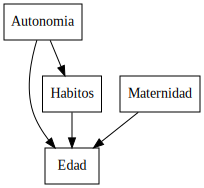

In [13]:
desc = """

# Structual
Edad ∼ Autonomia + Maternidad + Habitos
Habitos ∼ Autonomia

"""
g = semopy.semplot(desc, "out.png", plot_covs=True)
g

6. Ajusta el modelo a los datos disponibles y explora los estadísticos de bondad de ajuste. ¿Qué puedes concluir? (1 pt).

In [14]:
model = semopy.Model(desc)
res = model.fit(df)
stats = semopy.calc_stats(model)
print(stats.T)

                   Value
DoF             4.000000
DoF Baseline    8.000000
chi2            0.014214
chi2 p-value    0.999975
chi2 Baseline  19.576218
CFI             1.344308
GFI             0.999274
AGFI            0.998548
NFI             0.999274
TLI             1.688616
RMSEA           0.000000
AIC            11.999704
BIC            27.385793
LogLik          0.000148


7. Evalúa la significancia, magnitud y signo de los parámetros del modelo. ¿Qué puedes concluir en relación al modelo en cuestión? (2 pts). 

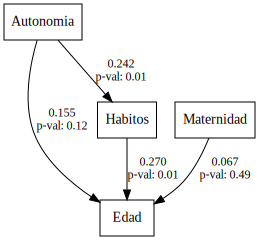

In [15]:
g = semopy.semplot(model, "out.png", plot_covs=True, std_ests=True)
g

In [16]:
estimates = model.inspect(std_est=True)
estimates

,lval,op,rval,Estimate,Est. Std,Std. Err,z-value,p-value
0,Habitos,~,Autonomia,0.274487,0.241542,0.112549,2.438834,1.473472e-02
1,Edad,~,Autonomia,0.158080,0.154756,0.101841,1.552221,1.206094e-01
2,Edad,~,Maternidad,0.087662,0.067410,0.125885,0.696370,4.861969e-01
3,Edad,~,Habitos,0.242632,0.269928,0.088815,2.731880,6.297408e-03
4,Habitos,~~,Habitos,15.630763,0.941657,2.256106,6.928203,4.262146e-12
5,Edad,~~,Edad,11.836524,0.882545,1.708455,6.928203,4.262146e-12
